# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

In [109]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

In [110]:
#import libraries for data manipulation
import numpy as np
import pandas as pd

#import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Reading the Data into a DataFrame

In [111]:
#Colab to access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/abtest.csv')

In [113]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [114]:
# To view first 5 rows from the data set
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [115]:
# To view last 5 rows from the data set
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [116]:
# Checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 100 rows and 6 columns.


In [117]:
# checking the data types of the different columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [118]:
# Displaying statistical summary for both the numerical and categorical variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# checking missing values accross each columns in the data
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [120]:
# Checking for duplicates
print("There are", df.duplicated().sum(), "duplicate rows in the dataset.")


There are 0 duplicate rows in the dataset.


### Univariate Analysis

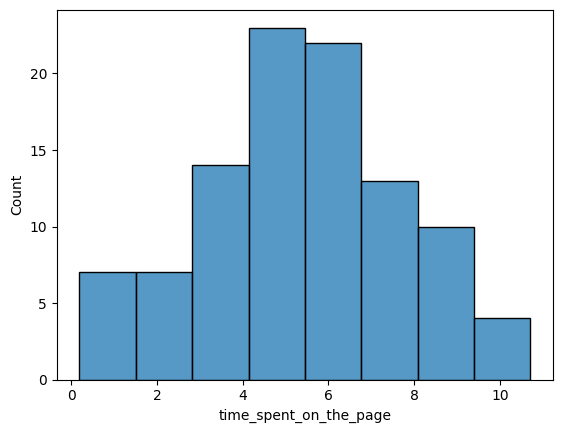

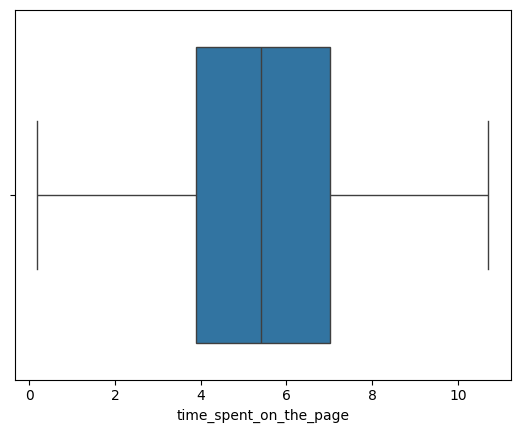

In [121]:
# Observtion on 'time_spent_on_the_page'
sns.histplot(x=df['time_spent_on_the_page'])
plt.show()
sns.boxplot(x=df['time_spent_on_the_page'])
plt.show()

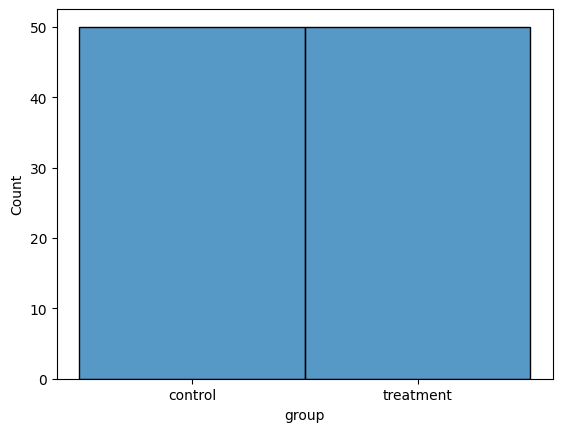

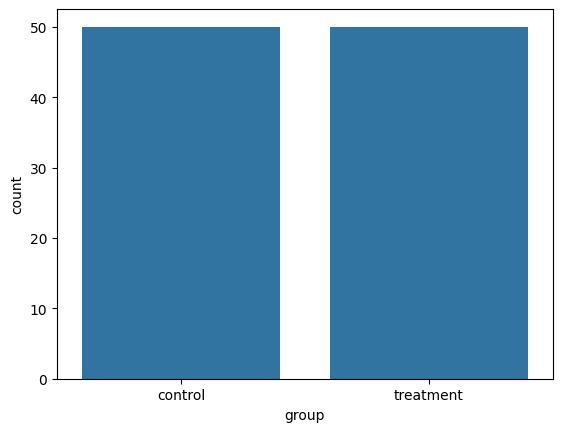

In [122]:
# Observtion on 'group'
sns.histplot(x=df['group'])
plt.show()
sns.countplot(x=df['group'])
plt.show()

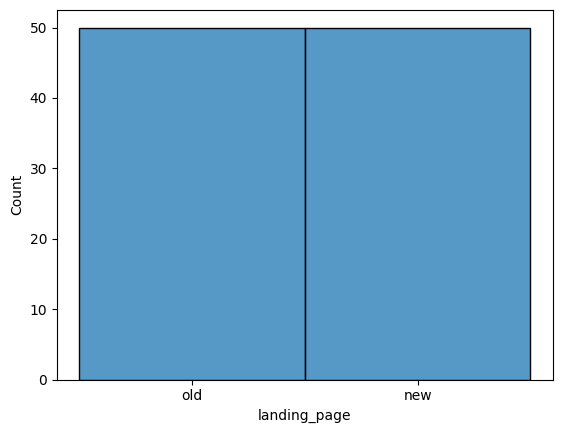

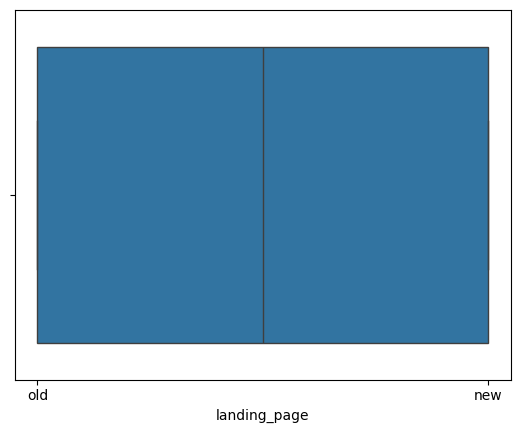

In [123]:
# Observtion on 'landing_page'
sns.histplot(x=df['landing_page'])
plt.show()
sns.boxplot(x=df['landing_page'])
plt.show()

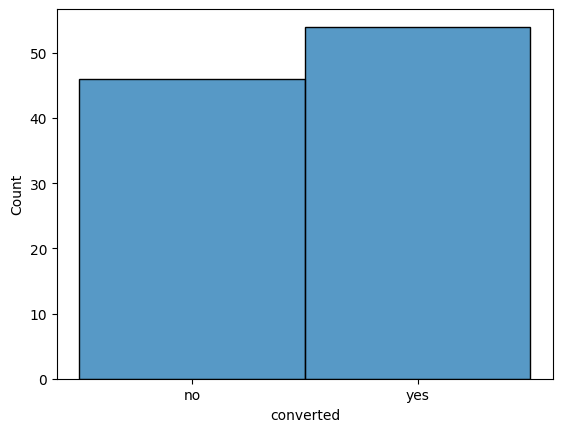

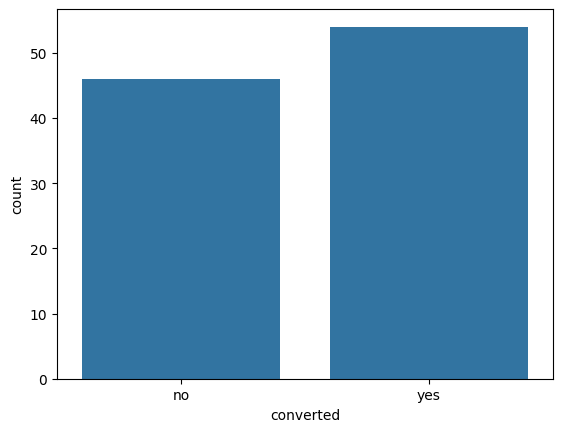

In [124]:
# Observtion on 'converted'
sns.histplot(x=df['converted'])
plt.show()
sns.countplot(x=df['converted'])
plt.show()

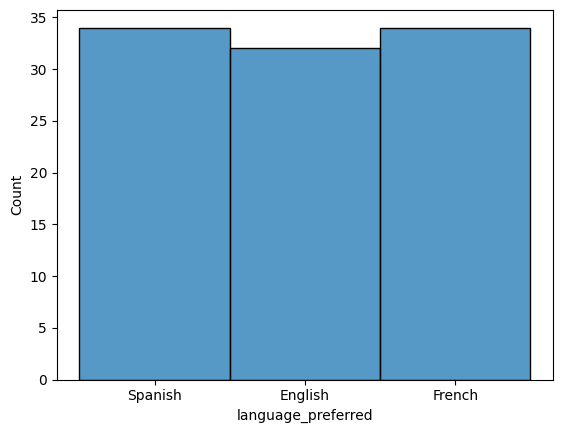

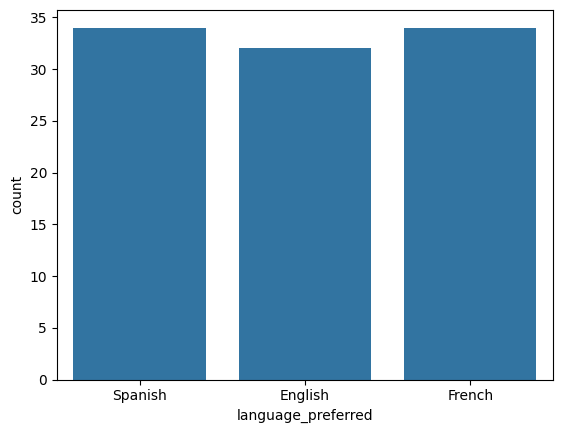

In [125]:
# Observtion on 'language_preferred'
sns.histplot(x=df['language_preferred'])
plt.show()
sns.countplot(x=df['language_preferred'])
plt.show()

### Bivariate Analysis

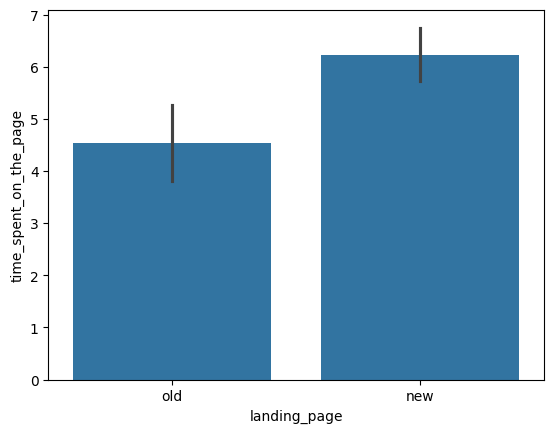

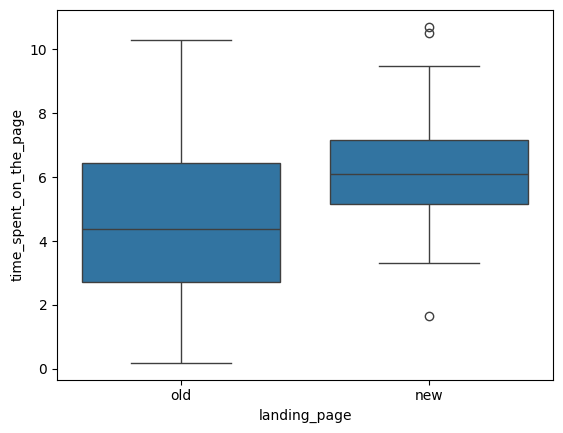

In [126]:
# Relationship between 'time spent on the page' and 'Landing page'
sns.barplot(data = df, x='landing_page', y='time_spent_on_the_page')
plt.show()

sns.boxplot(data = df, x='landing_page', y='time_spent_on_the_page')
plt.show()

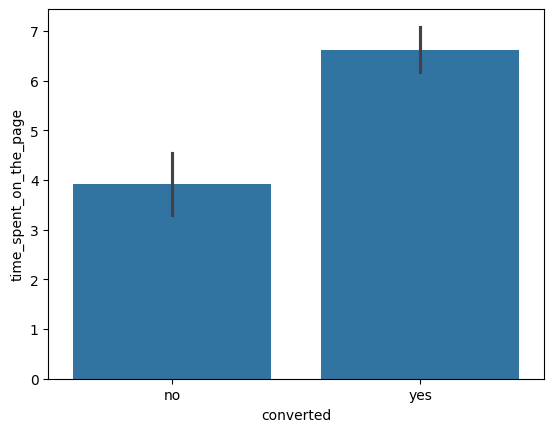

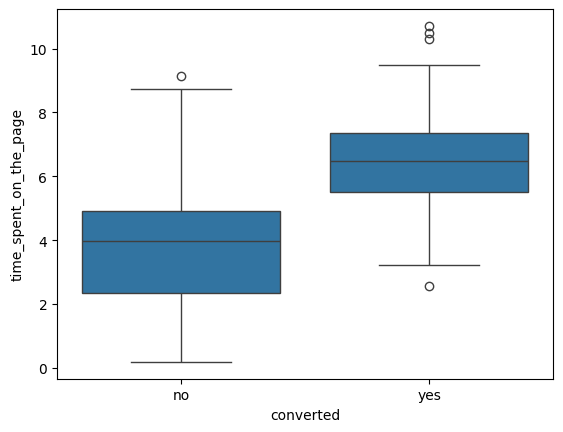

In [127]:
# Relationship between 'time spent on the page' and 'converted'
sns.barplot(data = df, x='converted', y='time_spent_on_the_page')
plt.show()

sns.boxplot(data = df, x='converted', y='time_spent_on_the_page')
plt.show()

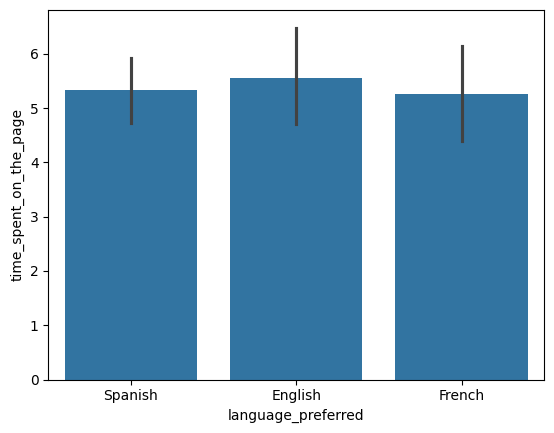

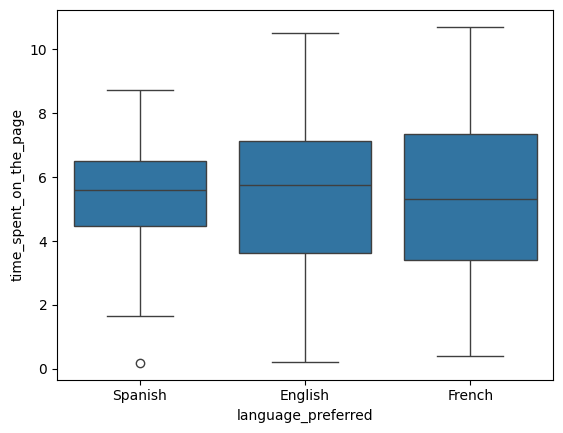

In [128]:
# Relationship between 'time spent on the page' and 'Language Preferred'
sns.barplot(data = df, x='language_preferred', y='time_spent_on_the_page')
plt.show()

sns.boxplot(data = df, x='language_preferred', y='time_spent_on_the_page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

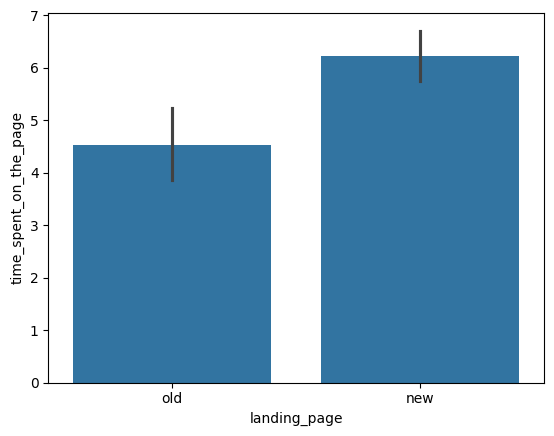

In [129]:
# To Perform Visual Analysis on time spent for new and existing landing page

sns.barplot(data = df, x='landing_page', y='time_spent_on_the_page')
plt.show()

### Step 1: Define the null and alternate hypotheses

H0: The mean time spent on the new landing page is equal to the time spent on the existing landing page

Ha: The mean time spent on the new landing page is greater than the time spent on the existing landing page



### Step 2: Select Appropriate test

Two sample Independent T-test would be appropriate based on two independent populations, unequal standard deviation and random sampling from the population

### Step 3: Decide the significance level

The significance level is 0.05 based on the problem statement

### Step 4: Collect and prepare data

In [130]:
# collect new landing page
Landing_page_new = df[df['landing_page'] == 'new']
Landing_page_new.head()


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [131]:
# collect Existing landing page
Landing_page_old = df[df['landing_page'] == 'old']
Landing_page_old.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
3,546567,control,old,3.02,no,French
5,546558,control,old,5.28,yes,English
7,546581,control,old,6.53,yes,Spanish
9,546548,control,old,2.08,no,English


In [132]:
# Collect the data to prepre for new and existing landing user
new_time_spent = df[df['landing_page'] == 'new']['time_spent_on_the_page']
existing_time_spent = df[df['landing_page'] == 'old']['time_spent_on_the_page']

print('The time spent on the new landing page is:', round(new_time_spent.std(),2))
print('The time spent on the existing landing page is:', round(existing_time_spent.std(),2))

The time spent on the new landing page is: 1.82
The time spent on the existing landing page is: 2.58


### Step 5: Calculate the p-value

In [133]:
# Calcualte the p-value for two-sample independent t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(new_time_spent, existing_time_spent, equal_var=False, alternative='greater')
print('The p-value is:', p_value)

The p-value is: 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [134]:
# Compare and print the p-value with α
if p_value < 0.05:
    print(f'The p-value {p_value} is less than the level of significance, so reject the null hypothesis.')
else:
    print(f'The p-value {p_value} is greater than the level of significance, so fail to reject the null hypothesis.')

The p-value 0.0001392381225166549 is less than the level of significance, so reject the null hypothesis.


### Step 7:  Draw inference

This p-value is much lesser than the level of significance of 5%, so the null hypothesis is rejected. So the evidence is, more number of users using new page than old page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Perform Visual Analysis

In [135]:
# To Perform Visual Analysis on landing page and converted
pd.crosstab(df['landing_page'], df['converted'])

converted,no,yes
landing_page,,
new,17,33
old,29,21


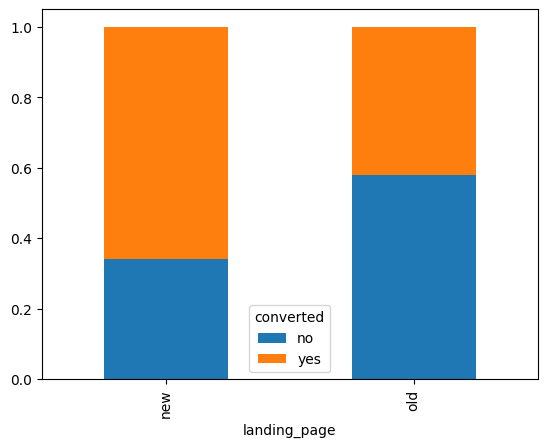

In [136]:
pd.crosstab(df['landing_page'], df['converted'], normalize='index').plot(kind='bar', stacked=True)
plt.show()

Step 1: Define the null and alternate hypotheses


H0 = 'The conversion rate for the new page is equal to the conversion rate for the old page'

Ha = 'The conversion rate for the new page is greater than the conversion rate for the old page'

Step 2: Select Appropriate test

This is two sample proportion z-test would be appropriate based on random sampling from the population and binomally distribution

Step 3: Decide the significance level

The significance level is 0.05

Step 4: Collect and Prepare the data

In [137]:
# Collect the number of converted users from new landing page
converted_new = df[df['landing_page'] == 'new'].converted.value_counts()['yes']

# Collect the number of converted users from old landing page
converted_old = df[df['landing_page'] == 'old'].converted.value_counts()['yes']

print('The number of converters from the new and old landing page arw {0} and {1} respectively.'.format(converted_new, converted_old))

# Count visitors from new landing page
new_visitors = df.landing_page.value_counts()['new']

# Count visitors from old landing page
old_visitors = df.landing_page.value_counts()['old']

print('The number of visitors from the new and old landing page arw {0} and {1} respectively.'.format(new_visitors, old_visitors))

The number of converters from the new and old landing page arw 33 and 21 respectively.
The number of visitors from the new and old landing page arw 50 and 50 respectively.


Step 5: Calculate the p-value

In [138]:
# Calculate p-value to perform two-proportion z-test
from statsmodels.stats.proportion import proportions_ztest

# Count of Converted
converted = np.array([converted_new, converted_old])

# Count of Visitors
visitors = np.array([new_visitors, old_visitors])

# find p-value
stat, pval = proportions_ztest(converted, visitors)
print('The p-value is:', pval)

The p-value is: 0.016052616408112556


Step 6: Compare the p-value with  α

In [139]:
# Provide the result based on p-value
if pval < 0.05:
    print(f'The p-value {pval} is less than the level of significance, so reject the null hypothesis.')
else:
    print(f'The p-value {pval} is greater than the level of significance, so fail to reject the null hypothesis.')

The p-value 0.016052616408112556 is less than the level of significance, so reject the null hypothesis.


Step 7: Draw inference

This p-value is much lesser than the level of significance of 5%, so the null hypothesis is rejected. So the evidence is the conversion rate for the new page is greater than the conversion rate for the old page.

## 3. Is the conversion and preferred language are independent or related?

Perform Visual Analysis

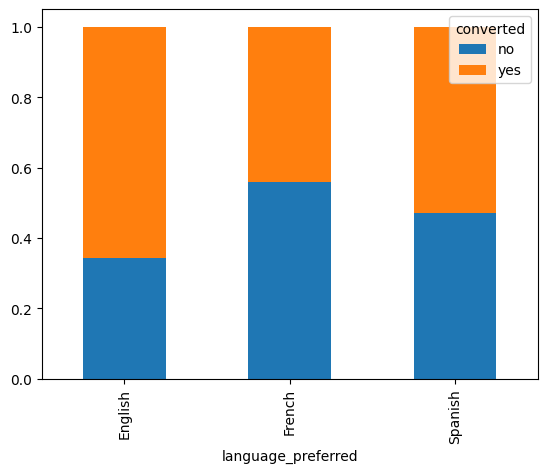

In [140]:
# To Perform Visual Analysis on conversion based on preferred language
pd.crosstab(df['language_preferred'], df['converted'],normalize='index').plot(kind='bar', stacked=True)
plt.show()

Step 1: Define the null and alternate hypotheses

H0: The conversion is independent of the preferred language

Ha: The conversion is dependent on the preferred language

Step 2: Select Appropriate test

This is a chi-square test for independence would be the appropriate based on random sampling from the population. This is an independence test with two categorical variables of conversion and preferred language

Step 3: Decide the significance level

The significance level is 0.05

Step 4: Collect and Prepare the data

In [141]:
# To create contigency table for the conversion and preferred language
conv_language = pd.crosstab(df['language_preferred'], df['converted'], margins=True)
conv_language.head()

converted,no,yes,All
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
All,46,54,100


Step 5: Calculate the p-value

In [142]:
# Perform chi-sqaured test for independence and find the p-value
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(conv_language)
print('The p-value is:', p)

The p-value is: 0.7970832186581234


Step 6: Compare the p-value with α

In [143]:
# Provide the result based on p-value
if p < 0.05:
    print(f'The p-value {p} is less than the level of significance, so reject the null hypothesis.')
else:
    print(f'The p-value {p} is greater than the level of significance, so fail to reject the null hypothesis.')


The p-value 0.7970832186581234 is greater than the level of significance, so fail to reject the null hypothesis.


Step 7: Draw inference

This p-value is greater than the level of significance of 5%, so fail to reject the null hypothesis. So the evidence is the conversion is independent of the preferred language.

## 4. Is the time spent on the new page same for the different language users?

Perform Visual Analysis

In [144]:
# Create a DataFrame for users those who spent time on the new pages
df_new = df[df['landing_page'] == 'new']
df_new.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


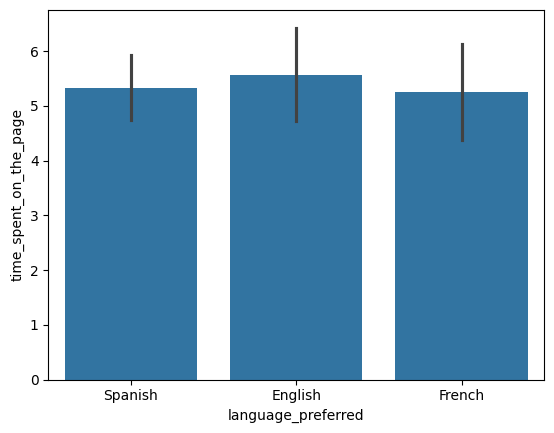

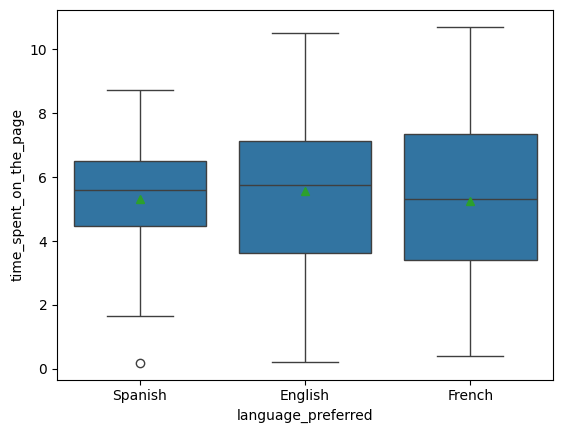

In [145]:
# To Perform Visual Analysis on time spent on the new page same for the different language users
sns.barplot(data = df, x='language_preferred', y='time_spent_on_the_page')
plt.show()
sns.boxplot(data = df, x='language_preferred', y='time_spent_on_the_page', showmeans = True)
plt.show()

Step 1: Define the null and alternate hypotheses

H0: The mean time spent on the new page is equal across different languages

Ha: The time spent on the new page is different for atleast one of the mean among other preferred languages

In [146]:
# Calculate mean value for the users who spent time  on the new page
df_new.groupby('language_preferred')['time_spent_on_the_page'].mean()

,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


Step 2: Select Appropriate test

A one-way ANOVA test would be appropriate based on three population means problem

Step 3: Decide the significance level

The significance level is 0.05

Step 4: Collect and Prepare the data

In [147]:
# Create subset for the time spent on the new page for each preferred language
time_spent_en = df_new[df_new['language_preferred'] == 'English']['time_spent_on_the_page']
time_spent_fr = df_new[df_new['language_preferred'] == 'French']['time_spent_on_the_page']
time_spent_es = df_new[df_new['language_preferred'] == 'Spanish']['time_spent_on_the_page']

Shaprio-Wilk's test

H0: New page times follow a normal distribution

Ha: New page times won't follow a normal distribution

In [148]:
# Perform Shaprio-wilk test and determine p-value
from scipy import stats
w, p_value = stats.shapiro(df_new['time_spent_on_the_page'])
print('The p-value is:', p_value)
print('The p-value is greater than the level of significance, so fail to reject the null hypothesis.')


The p-value is: 0.8040040364746845
The p-value is greater than the level of significance, so fail to reject the null hypothesis.


Levene's test

H0: All the population variances are equal

Ha: At least one variance is different from the remaining variance


In [149]:
# Perform Levene test and determine p-value
from scipy.stats import levene
statistic, p_value = stats.levene(df_new[df_new['language_preferred'] == 'English']['time_spent_on_the_page'],
                                  df_new[df_new['language_preferred'] == 'French']['time_spent_on_the_page'],
                                  df_new[df_new['language_preferred'] == 'Spanish']['time_spent_on_the_page'])

print('The p-value is:', p_value)
print('The p-value is greater than the level of significance, so fail to reject the null hypothesis.')


The p-value is: 0.46711357711340173
The p-value is greater than the level of significance, so fail to reject the null hypothesis.


Step 5: Calculate the p-value

In [150]:
# Perform one-way ANOVA test
from scipy.stats import f_oneway
f_value, p_value = f_oneway(time_spent_en, time_spent_fr, time_spent_es)
print('The p-value is:', p_value)

The p-value is: 0.43204138694325955


Step 6: Compare the p-value with α

In [151]:
# Provide the result based on p-value
if p_value < 0.05:
    print(f'The p-value {p_value} is less than the level of significance, so reject the null hypothesis.')
else:
    print(f'The p-value {p_value} is greater than the level of significance, so fail to reject the null hypothesis.')

The p-value 0.43204138694325955 is greater than the level of significance, so fail to reject the null hypothesis.


Step 7: Draw inference

The p-value is greater than the level of significance, so fail to reject the null hypothesis, so the time spent on the new page is equal across different languages

## Conclusion and Business Recommendations

Conclusion:

1. On the first question - the users spend more time on the new landing page than the existing landing page, the null hypotheses is the mean time spent on the new landing page is equal to the time spent on the existing landing page and alternative hypotheses is on the new landing page is greater than the time spent on the existing landing page. It is a two sample independent T-test. This p-value (0.0001392) is much lesser than the level of significance of 5%, so the null hypothesis is rejected. So the evidence that more number of users using new page than old page

2. On the second question - The conversion rate for the new page greater than the conversion rate for the old page - Null hypotheses - The conversion rate for the new page is equal to the conversion rate for the old page, Alternative hypotheses - The conversion rate for the new page is greater than the conversion rate for the old page. Two sample proportion z-test was performed. This p-value (0.016052) is much lesser than the level of significance of 5%, so the null hypothesis is rejected and the evidence is the conversion rate for the new page is greater than the conversion rate for the old page.

3. On the third question - the conversion and preferred language are independent or related. Null hypotheses - the conversion is independent of the preferred language. Alternative hypotheses - The conversion is dependent on the preferred language. Chi-sqaure test for independence was performed.
This p-value (0.797) is greater than the level of significance of 5%, so fail to reject the null hypothesis. So the evidence is the conversion is independent of the preferred language.

4. On the fourth question - the time spent on the new page same for the different language users - Null hypotheses - The mean time spent on the new page is equal across different languages. Alternative Hypotheses - The time spent on the new page is different for atleast one of the mean among other preferred languages. A one-way ANOVA test was performed. Shaprio-Wilk's test and Levene's test was performed and determined p-value. The p-value (0.43204) is greater than the level of significance, so fail to reject the null hypothesis, so the time spent on the new page is equal across different languages.

Recommendations:

1. Enews Express should give more focus to expanding the business to new landing page since more users are using new landing page.

2. The new landing page volumne has increased and more time spent on the new landing page, so the opportunity might increase.

3. Implementing new landing page to all the preferred language would attract more users.

___